 GenAI & Machine Learning Bootcamp 2025 - Full Time 2025 - PSTB Machine Learning Supervised Machine Learning : Feature Engineering and Hyperparameter T Breast Cancer Prediction
Breast Cancer Prediction
Last Updated: January 15th, 2024

Daily Challenge: Breast Cancer Prediction


What you will learn
Data visualization with scatter plots.
Basic understanding of classification models
Interpreting the results.


What you will create
In this notebook, you will be using 4 classification models- Logistic Regression, K Nearest Neighbours, Random Forests and Support Vector Machines (SVM).
dataset available here



Your Task
Exploratory Data Analysis
Use pandas to load the dataset and examine the first few rows.
Check and handle the missing values.
Drop any unnecessary column
Create a Countplot to display diagnosis from magma

Data Preprocessing, Building Models and Evaluation :
counts of unique rows in the ‘diagnosis’ column
map categorical values to numerical values
Splitting the data into train and test
Implement logistic regression and print the accuracy.
Implement K Nearest Neighbours and print the accuracy.
Implement Random Forests and print the accuracy.
Implement Support Vector Machines (SVM) and print the accuracy.
Which is the best model ?

Duration & Difficulty
Duration (approx)	Difficulty
60 minutes	⭐⭐


Submit your Daily Challenge
Don’t forget to push your Jupyter Notebook or Python script to GitHub and share it in your network.

In [1]:
# Importer les bibliothèques utiles :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import norm, f_oneway, binom, pearsonr, spearmanr
import scipy.linalg as la
from pprint import pprint


In [4]:
from google.colab import files
files.upload()

Saving data.csv to data (1).csv


{'data (1).csv': b'"id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst",\r\n842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189\r\n842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902\r\n84300903

In [6]:
df = pd.read_csv("data.csv")

In [7]:
# Afficher les premières lignes
df.head(-1).T


,0,1,2,3,4,5,6,7,8,9,...,558,559,560,561,562,563,564,565,566,567
id,842302,842517,84300903,84348301,84358402,843786,844359,84458202,844981,84501001,...,925277,925291,925292,925311,925622,926125,926424,926682,926954,927241
diagnosis,M,M,M,M,M,M,M,M,M,M,...,B,B,B,B,M,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29,12.45,18.25,13.71,13.0,12.46,...,14.59,11.51,14.05,11.2,15.22,20.92,21.56,20.13,16.6,20.6
texture_mean,10.38,17.77,21.25,20.38,14.34,15.7,19.98,20.83,21.82,24.04,...,22.68,23.93,27.15,29.37,30.62,25.09,22.39,28.25,28.08,29.33
perimeter_mean,122.8,132.9,130.0,77.58,135.1,82.57,119.6,90.2,87.5,83.97,...,96.39,74.52,91.38,70.67,103.4,143.0,142.0,131.2,108.3,140.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0,477.1,1040.0,577.9,519.8,475.9,...,657.1,403.5,600.4,386.0,716.9,1347.0,1479.0,1261.0,858.1,1265.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003,0.1278,0.09463,0.1189,0.1273,0.1186,...,0.08473,0.09261,0.09929,0.07449,0.1048,0.1099,0.111,0.0978,0.08455,0.1178
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328,0.17,0.109,0.1645,0.1932,0.2396,...,0.133,0.1021,0.1126,0.03558,0.2087,0.2236,0.1159,0.1034,0.1023,0.277
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198,0.1578,0.1127,0.09366,0.1859,0.2273,...,0.1029,0.1112,0.04462,0.0,0.255,0.3174,0.2439,0.144,0.09251,0.3514
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043,0.08089,0.074,0.05985,0.09353,0.08543,...,0.03736,0.04105,0.04304,0.0,0.09429,0.1474,0.1389,0.09791,0.05302,0.152


# NOTA (Remarques Clara) dans une démarche MACHINE LEARNING
Pour le Machine Learning, on identifie aussitôt les 2 colonnes X et Y.
"On utilise comme features ..." et on cherche à produire ...

In [8]:
# Exploration initiale
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
# Nettoyage des données

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Map categorical values to numerical values for 'diagnosis'
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [10]:
# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

# Résultat : aucune valeur manquante.


,0
Unnamed: 32,569


In [11]:
# Exploration initiale
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [13]:
df.dtypes

,0
id,int64
diagnosis,int64
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [14]:
# Suppression de colonnes

df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

# 'id' n’identifie qu’un patient, ne sert pas à prédire
# 'Unnamed': entièrement vide

In [15]:
# Exploration initiale
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

/tmp/ipython-input-16-210295352.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diagnosis', palette='magma')


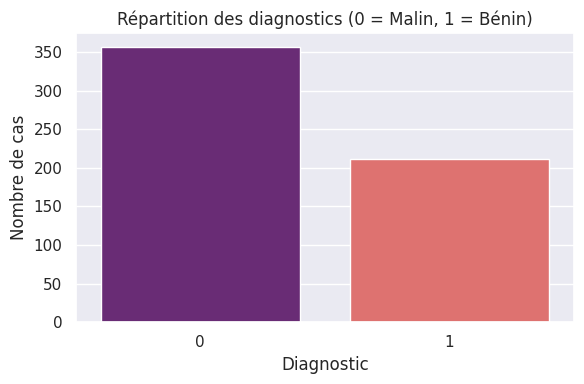

In [16]:
# Visualisation avec un Countplot (type de diagnostic)
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='diagnosis', palette='magma')
plt.title("Répartition des diagnostics (0 = Malin, 1 = Bénin)")
plt.xlabel("Diagnostic")
plt.ylabel("Nombre de cas")
plt.tight_layout()
plt.show()

In [17]:
# Exploration initiale
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [18]:
# Création d'un scatter plot pour deux caractéristiques (très important pour orienter la suite)
# Choix arbitraire : mean radius vs mean texture, colorié par le diagnostic



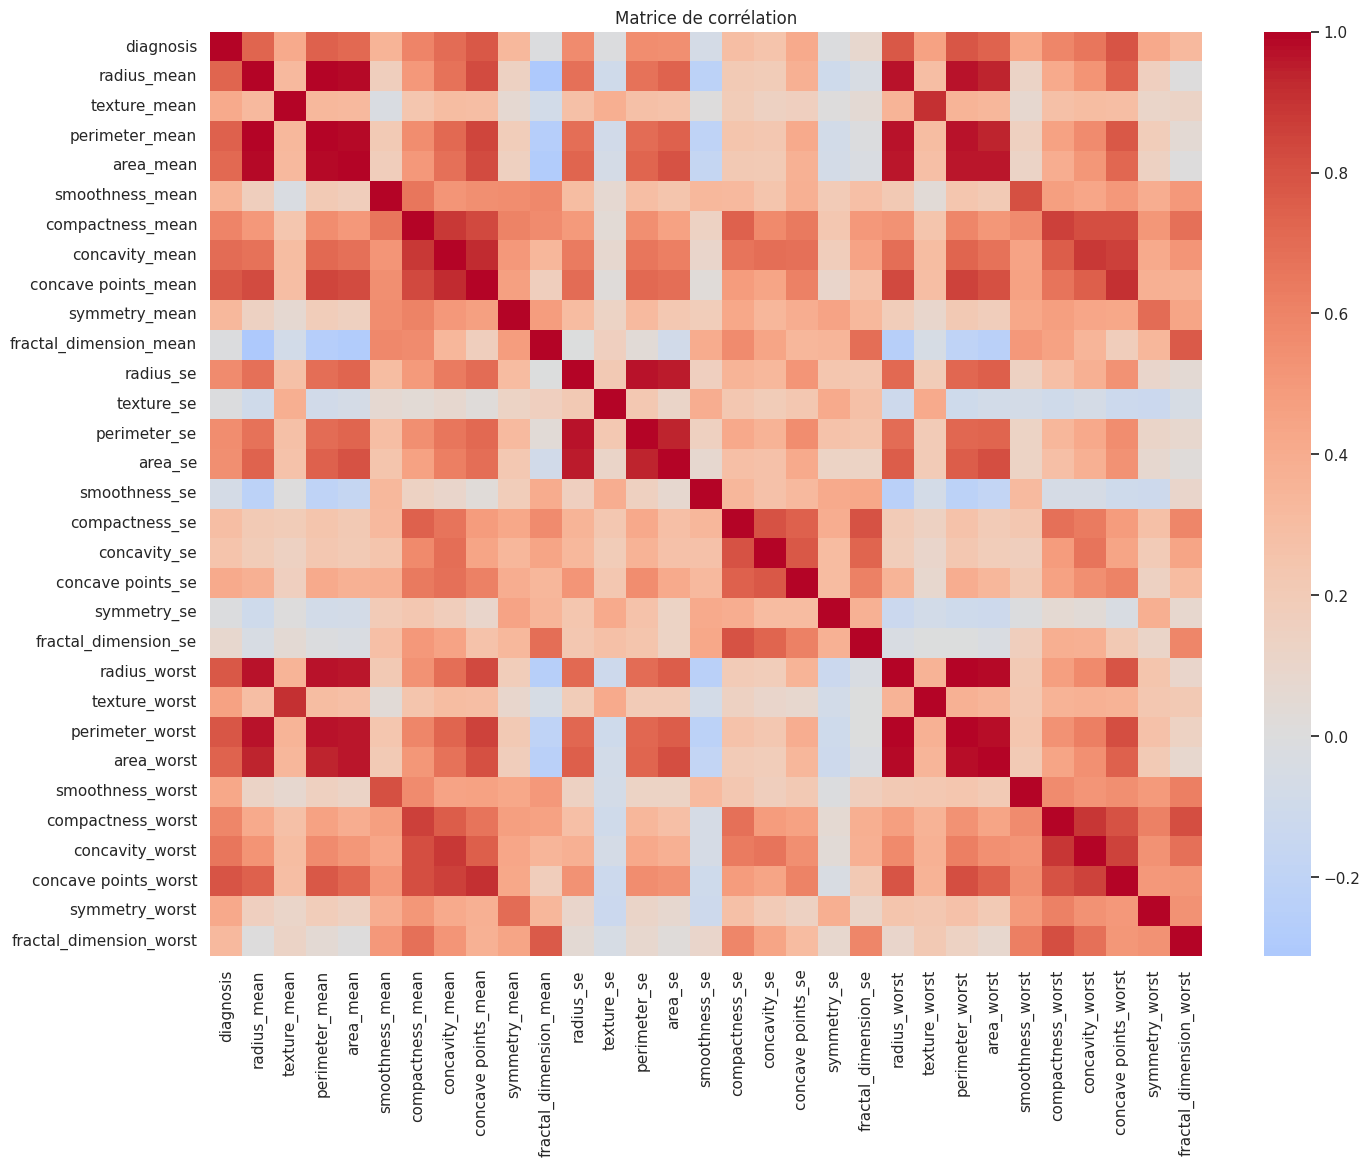

In [19]:
# Calcul de la matrice de corrélation

corr_matrix = df.corr(numeric_only=True)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation")
plt.show()

# Commentaire de Clara :
Analyse des Outliers - très important également

# Commentaire :
La répartition montre un certain déséquilibre entre diagnostics bénins et malin.

In [22]:
# Comptage des occurrences dans la colonne 'diagnosis'
diagnosis_counts = df['diagnosis'].value_counts()
diagnosis_counts


,count
diagnosis,
0,357
1,212


In [23]:
# Séparation des variables explicatives (X) et la cible (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Vérifier les dimensions
X.shape, y.shape

((569, 30), (569,))

In [24]:
# Séparation des données en train et test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [28]:
# Importation des bibliothèques nécessaires
from sklearn.model_selection import train_test_split

# Définir X (caractéristiques) et y (cible)
X = df.drop('diagnosis', axis=1)  # 'diagnosis' = cible
y = df['diagnosis']

# séparation entraînement/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérification des dimensions :
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [29]:
# Implémentation de la régression logistique
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [30]:
# Créer et entraîner le modèle
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [31]:
# Prédictions
y_pred_logreg = logreg.predict(X_test)

In [32]:
# Évaluer la précision
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_logreg

0.956140350877193

# Régression logistique
Précision obtenue : 95.6 %

In [ ]:
# Standardiser les données
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
# Ajuster sur X_train et transformer X_train et X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Vérifier la distribution centrée-réduite
pd.DataFrame(X_train_scaled).describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,...,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00,455.00
mean,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,...,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.82,-2.22,-1.81,-1.37,-3.10,-1.61,-1.12,-1.27,-2.35,-1.78,...,-1.57,-2.23,-1.58,-1.15,-2.62,-1.46,-1.31,-1.75,-2.12,-1.62
25%,-0.68,-0.71,-0.69,-0.66,-0.71,-0.78,-0.75,-0.73,-0.70,-0.71,...,-0.66,-0.74,-0.69,-0.64,-0.74,-0.70,-0.76,-0.77,-0.65,-0.72
50%,-0.23,-0.12,-0.24,-0.29,-0.08,-0.24,-0.34,-0.39,-0.07,-0.18,...,-0.26,-0.05,-0.28,-0.34,-0.03,-0.28,-0.23,-0.24,-0.12,-0.21
75%,0.46,0.56,0.49,0.32,0.63,0.53,0.55,0.67,0.54,0.46,...,0.45,0.69,0.53,0.27,0.63,0.57,0.54,0.72,0.43,0.46
max,3.96,4.72,3.98,5.21,4.86,3.96,4.26,4.02,4.48,4.82,...,4.12,3.96,4.32,5.96,3.77,4.42,4.67,2.71,5.92,5.00


In [ ]:
# Implémentation de K Nearest Neighbours (KNN)
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# Créer le modèle KNN avec k=5 (par défaut)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
# Prédictions
y_pred_knn = knn.predict(X_test_scaled)

In [ ]:
# Évaluer la précision
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.9473684210526315

# Résultat K Nearest Neighbours (KNN)
Précision obtenue : 94.7 %; c’est très proche de la régression logistique.

In [ ]:
# Implémentation de Random Forest (pour comparaison)
from sklearn.ensemble import RandomForestClassifier

# Créer et entraîner le modèle
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Prédictions
y_pred_rf = rf.predict(X_test_scaled)

In [ ]:
# Évaluer la précision
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.9649122807017544

# Résultat :
Précision obtenue : 96.5 %
C’est le meilleur score parmi les modèles testés.

In [36]:
# Importation du scaler

from sklearn.preprocessing import StandardScaler

# Application de la transformation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraînement du modèle SVM
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [40]:
# Définition de Y_pred_svm :
Y_pred_svm = svm.predict(X_test_scaled)

In [41]:
# Évaluer la précision
accuracy_svm = accuracy_score(y_test, Y_pred_svm)
accuracy_svm

0.956140350877193

# Support Vector Machines (SVM)
Précision obtenue : 95.6 %
Aussi bon que la régression logistique, mais légèrement inférieur au Random Forest

In [46]:
# Entraînement de mon modèle Logistic Regression avec amélioration, et calcul de précision.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Entraînement sur données standardisées
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Prédiction
y_pred_logreg = logreg.predict(X_test_scaled)

# Précision
accuracy_logreg_improved = accuracy_score(y_test, y_pred_logreg)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Entraînement du modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Prédictions
y_pred_knn = knn.predict(X_test_scaled)

# Calcul de la précision
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Entraînement
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Prédiction
y_pred_rf = rf.predict(X_test_scaled)

# Calcul de la précision
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [57]:
# Visualisation comparative des performances

# Dictionnaire des scores
model_scores = {
    'Logistic Regression': accuracy_logreg_improved,
    'KNN': accuracy_knn,
    'Random Forest': accuracy_rf,
    'SVM': accuracy_svm
}


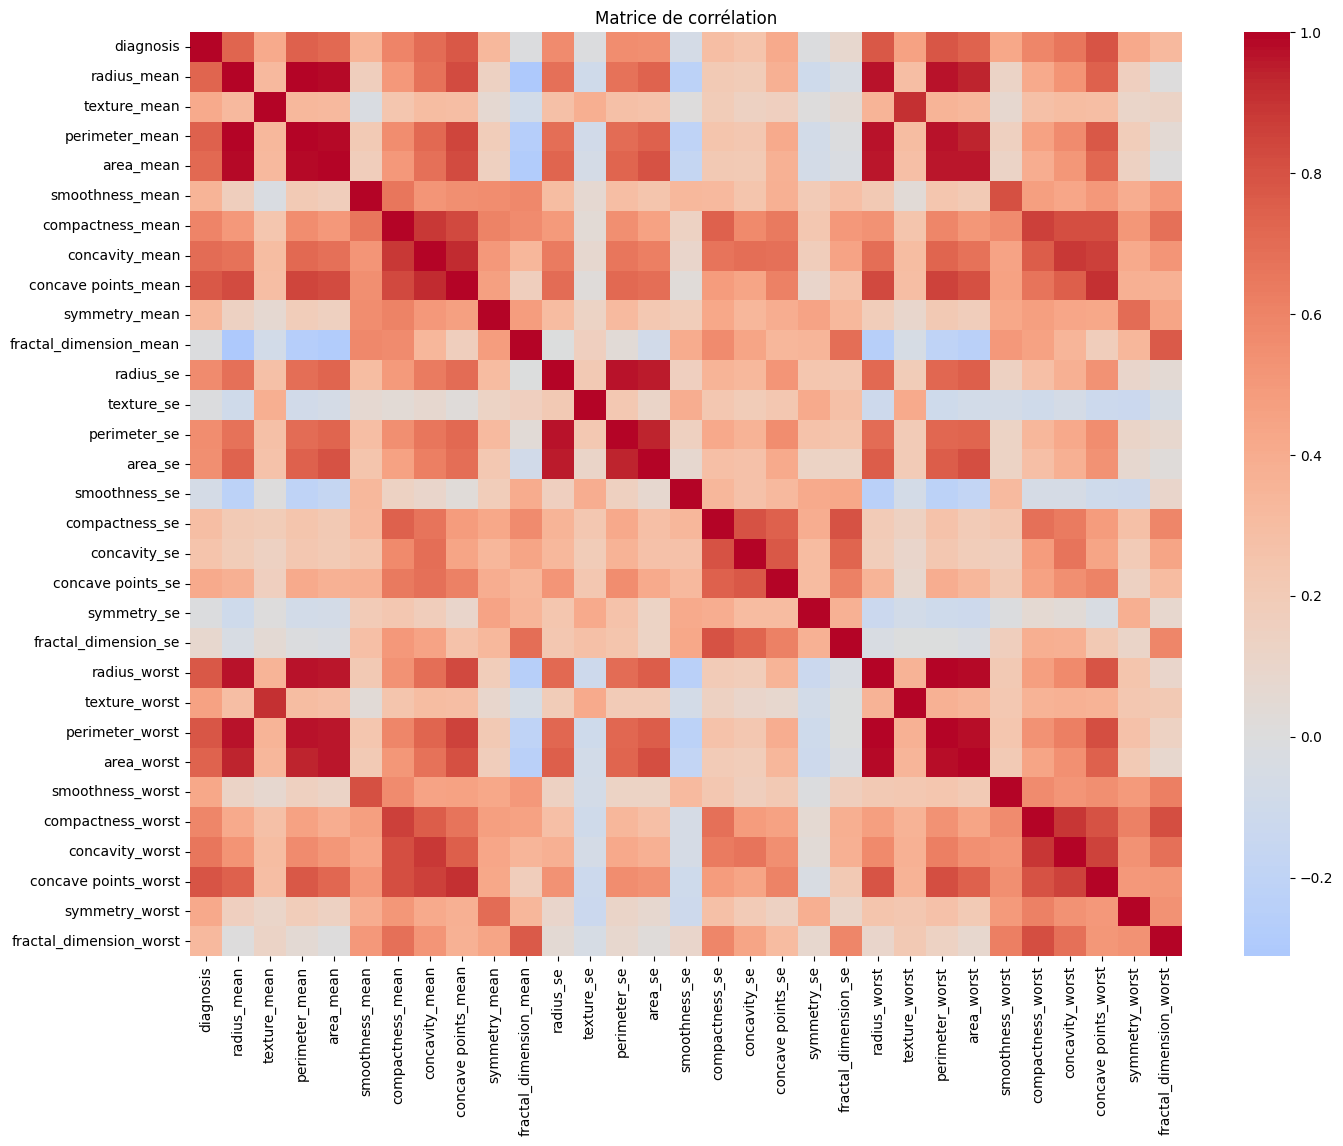

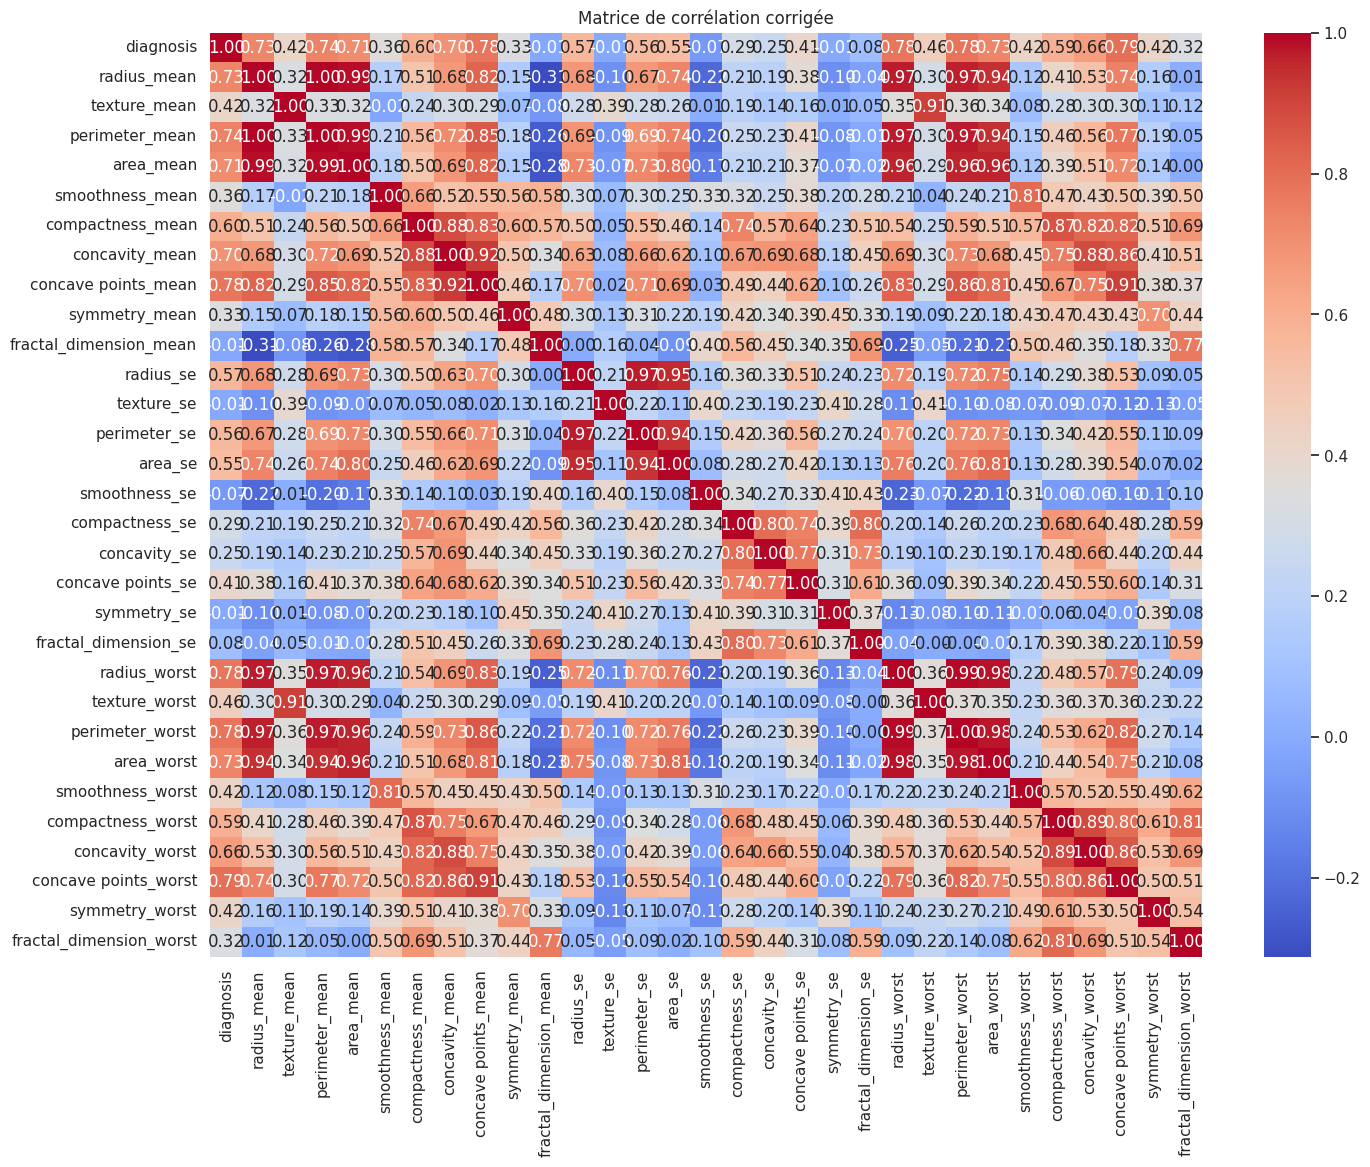

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation corrigée")
plt.show()

In [59]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix.round(2))

                         diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                     1.00         0.73          0.42            0.74   
radius_mean                   0.73         1.00          0.32            1.00   
texture_mean                  0.42         0.32          1.00            0.33   
perimeter_mean                0.74         1.00          0.33            1.00   
area_mean                     0.71         0.99          0.32            0.99   
smoothness_mean               0.36         0.17         -0.02            0.21   
compactness_mean              0.60         0.51          0.24            0.56   
concavity_mean                0.70         0.68          0.30            0.72   
concave points_mean           0.78         0.82          0.29            0.85   
symmetry_mean                 0.33         0.15          0.07            0.18   
fractal_dimension_mean       -0.01        -0.31         -0.08           -0.26   
radius_se                   

In [60]:
df = df.apply(pd.to_numeric, errors='coerce')

In [61]:
print(df.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [62]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

                         diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.

In [63]:
df.duplicated().sum()

np.int64(0)

In [64]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [65]:
df.nunique()

,0
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542
symmetry_mean,432


In [66]:
df.shape
df.columns
df.dtypes
df.nunique()
df.duplicated().sum()
df.isnull().sum()
df.corr(numeric_only=True)
df.skew(numeric_only=True)


,0
diagnosis,0.528461
radius_mean,0.942380
texture_mean,0.650450
perimeter_mean,0.990650
area_mean,1.645732
smoothness_mean,0.456324
compactness_mean,1.190123
concavity_mean,1.401180
concave points_mean,1.171180
symmetry_mean,0.725609


In [67]:
df.corr(numeric_only=True)
df.skew(numeric_only=True)

,0
diagnosis,0.528461
radius_mean,0.942380
texture_mean,0.650450
perimeter_mean,0.990650
area_mean,1.645732
smoothness_mean,0.456324
compactness_mean,1.190123
concavity_mean,1.401180
concave points_mean,1.171180
symmetry_mean,0.725609
